# Linear Mixed Effects Models

### Importing the Data

In [1]:
import numpy as np
import pandas as pd
from notebooks.helpers import import_raw_data

data = import_raw_data()

In [2]:
data.Study = data.Study.str.lower().str.strip()
data.API = data.API.str.lower().str.strip()
data.Pgp = data.Pgp.str.lower().str.strip()
data.Position = data.Position.str.lower().str.strip()
data.Comp1 = data.Comp1.str.lower().str.strip()
data.Comp2 = data.Comp2.str.lower().str.strip()
data.CarrierNature = data.CarrierNature.str.lower().str.strip()
data.Preparation = data.Preparation.str.lower().str.strip()
data.Solvent = data.Solvent.str.lower().str.strip()
data.Stabilizer = data.Stabilizer.str.lower().str.strip()
data.Separation = data.Separation.str.lower().str.strip()
data.Ligands = data.Ligands.str.lower().str.strip()
data.NPShape = data.NPShape.str.lower().str.strip()
data.Route = data.Route.str.lower().str.strip()
data.logP = pd.to_numeric(data.logP)
data.pKa = pd.to_numeric(data.pKa)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject                              403 non-null    int64  
 1   Study                                403 non-null    object 
 2   API                                  403 non-null    object 
 3   Weight                               403 non-null    float64
 4   logP                                 403 non-null    float64
 5   pKa                                  403 non-null    float64
 6   Solubility                           403 non-null    float64
 7   Pgp                                  403 non-null    object 
 8   DrugCarrierRatio                     403 non-null    float64
 9   Position                             403 non-null    object 
 10  Comp1                                403 non-null    object 
 11  Comp2                           

### Fitting the model

In [4]:
import statsmodels.formula.api as smf

lmem = smf.mixedlm("AUC ~ Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route", data, groups="Subject")
lmemf = lmem.fit(method=['lbfgs'])
lmemf.summary()

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:                 MixedLM    Dependent Variable:    AUC       
No. Observations:      403        Method:                REML      
No. Groups:            403        Scale:                 6.0727    
Min. group size:       1          Log-Likelihood:        -1066.7464
Max. group size:       1          Converged:             Yes       
Mean group size:       1.0                                         
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 3.017    0.886  3.403 0.001  1.279  4.754
Pgp[T.yes]               -0.678    0.439 -1.545 0.122 -1.539  0.182
Position[T.matrix]       -0.771    0.696 -1.109 0.268 -2.135  0.592
Comp1[T.cd]              15.105    1.668  9.053 0.000 11.835 18.375
Comp1[T.chitosan]         0.016    1.129  0.014 0.989 -2.198  2.230
Comp1[T.dextran]          4.070    2.036  1.999 0.046  0.079  8.061
Comp1[T.other]            0.063    1.356  0.047 0.963 -2.594  2.720
Comp1[T.pcl]              1.061    1.279  0.830 0.407 -1.445  3.568
Comp1[T.phospholipids]    0.249    1.111  0.224 0.822 -1.927  2.426
Comp1[T.pla]              0.230    1.274  0.181 0.857 -2.267  2.727
Comp1[T.plga]             1.374    0.980  1.402 0.161 -0.546  3.294
Comp1[T.poloxamer]       -0.446    1.572 -0.283 0.777 -3.527  2.636
Comp1[T.protien]          0.984    1.238  0.794 0.427 -1.444  3.411
Comp1[T.pvp]              0.054    2.560  0.021 0.983 -4.963  5.071
Comp1[T.solid lipid]     -0.223    0.990 -0.225 0.822 -2.164  1.718
Comp2[T.cholesterol]     -0.446    1.760 -0.254 0.800 -3.897  3.004
Comp2[T.none]             0.381    0.706  0.540 0.589 -1.002  1.764
Comp2[T.other]            0.193    1.162  0.166 0.868 -2.084  2.470
Comp2[T.peg]             -1.952    0.727 -2.687 0.007 -3.377 -0.528
Comp2[T.phospholipids]    0.731    0.985  0.742 0.458 -1.200  2.662
Comp2[T.protien]          0.197    1.575  0.125 0.900 -2.891  3.285
Comp2[T.sodium alginate] -0.603    1.685 -0.358 0.721 -3.906  2.700
Comp2[T.solid lipid]      0.670    1.651  0.406 0.685 -2.567  3.907
Comp2[T.tween]            0.350    1.285  0.272 0.785 -2.168  2.868
Route[T.ip]              -0.377    0.983 -0.384 0.701 -2.303  1.548
Route[T.iv]              -1.933    0.435 -4.444 0.000 -2.785 -1.080
Route[T.po]              -0.747    0.604 -1.237 0.216 -1.931  0.437
Weight                   -0.000    0.000 -0.692 0.489 -0.000  0.000
logP                     -0.133    0.067 -1.982 0.048 -0.264 -0.001
Solubility               -0.002    0.004 -0.507 0.612 -0.011  0.006
DrugCarrierRatio          0.430    0.510  0.843 0.399 -0.569  1.430
Size                      0.000    0.002  0.046 0.963 -0.004  0.004
Zeta                     -0.001    0.009 -0.069 0.945 -0.019  0.017
Release                   0.000    0.004  0.018 0.986 -0.007  0.007
Subject Var               6.073                                    
===================================================================

"""

In [5]:
pred = lmemf.predict(exog=pd.DataFrame(
        {'Weight': [252.268, 252.268, 252.268, 252.268], 'logP': [2.260, 2.260, 2.260, 2.260],
         'Solubility': [0.071, 0.071, 0.071, 0.071], 'Pgp': ['yes', 'yes', 'yes', 'yes'],
         'DrugCarrierRatio': [0.480, 0.480, 0.480, 0.480], 'Position': ['core', 'core', 'core', 'core'],
         'Comp1': ['plga', 'plga', 'plga', 'plga'], 'Comp2': ['phospholipids', 'chitosan', 'phospholipids', 'chitosan'],
         'Size': [170.630, 453.100, 170.630, 453.100], 'Zeta': [-37.700, 33.400, -37.700, 33.400],
         'Release': [2.26, 2.95, 2.26, 2.95], 'Route': ['in', 'in', 'iv', 'iv']}))
pred

0    4.377671
1    3.626126
2    2.444946
3    1.693401
dtype: float64

In [6]:
true = [1.03, 2.96, 0.365, 0.614]

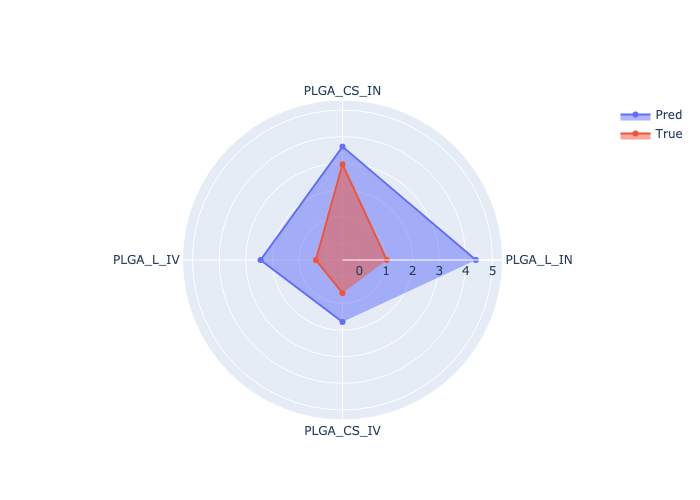

In [7]:
from helpers import radar_graph

radar_graph(true, pred)

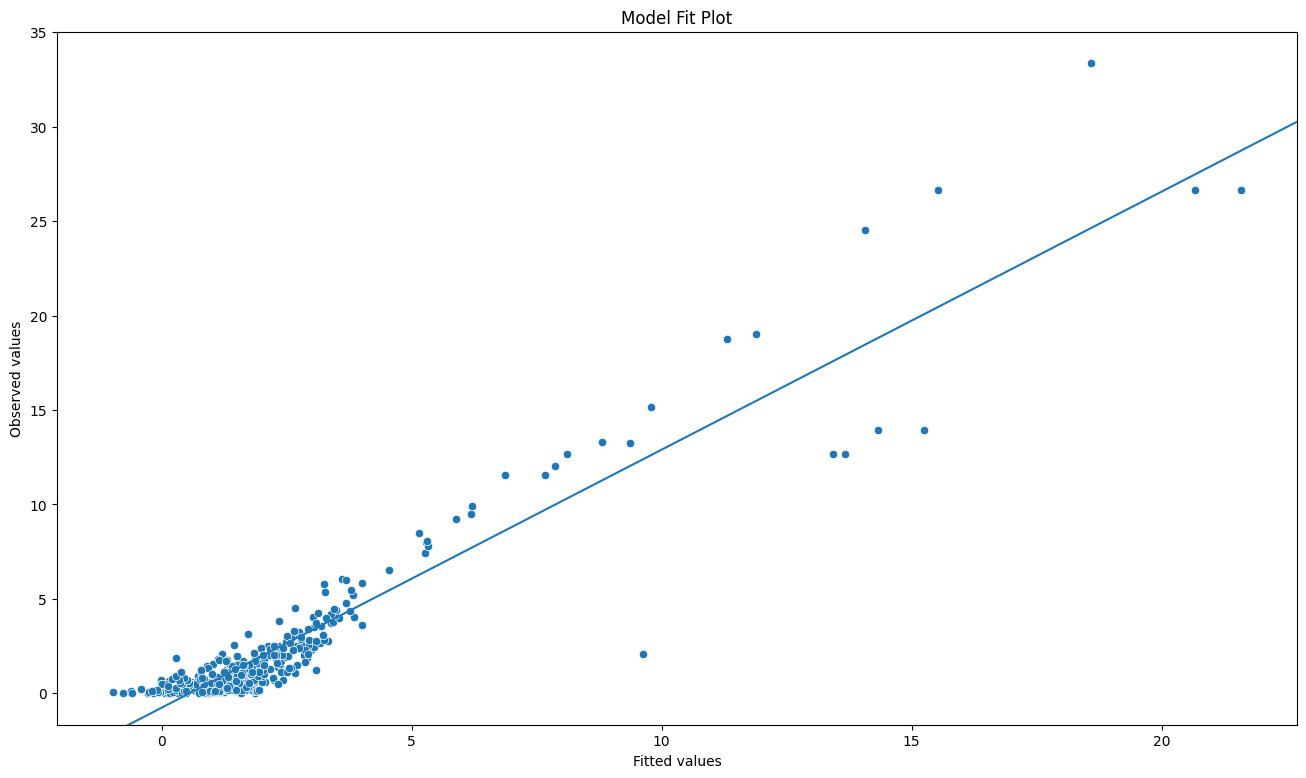

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:117: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



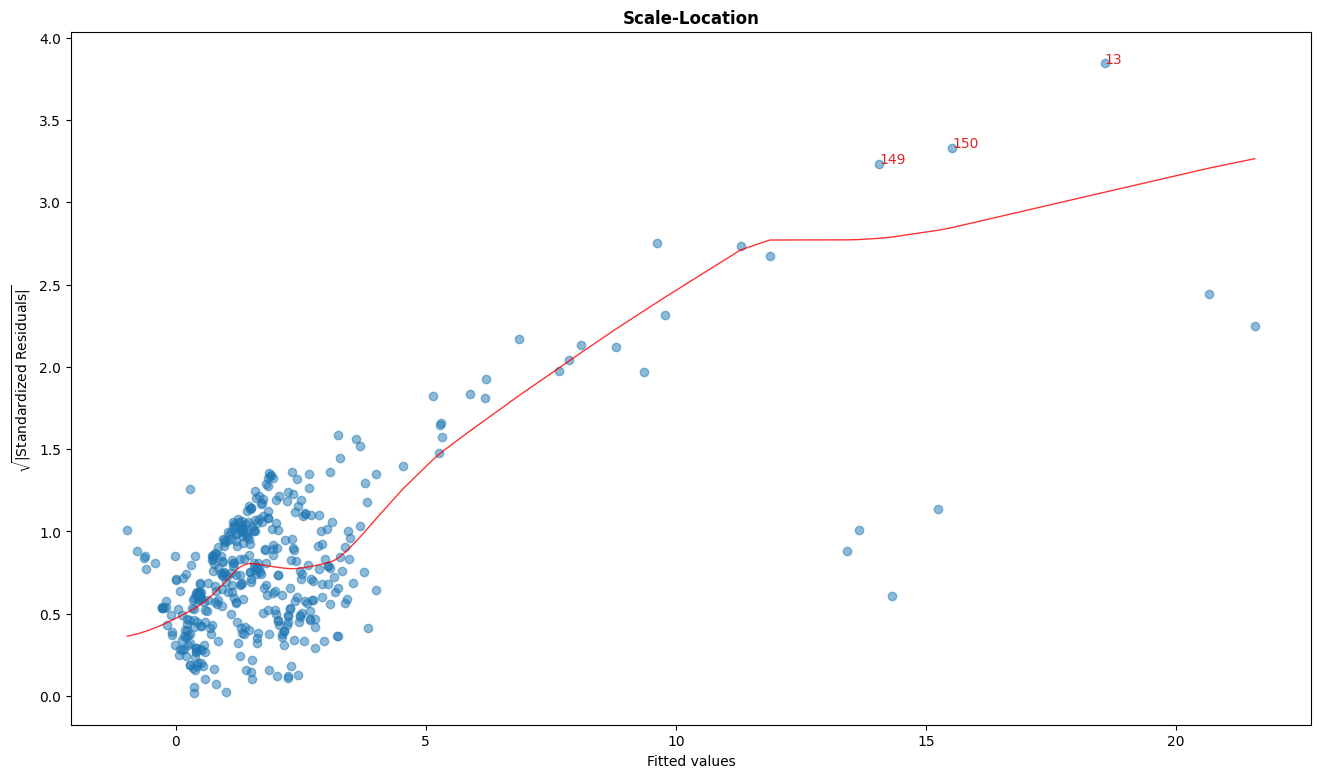

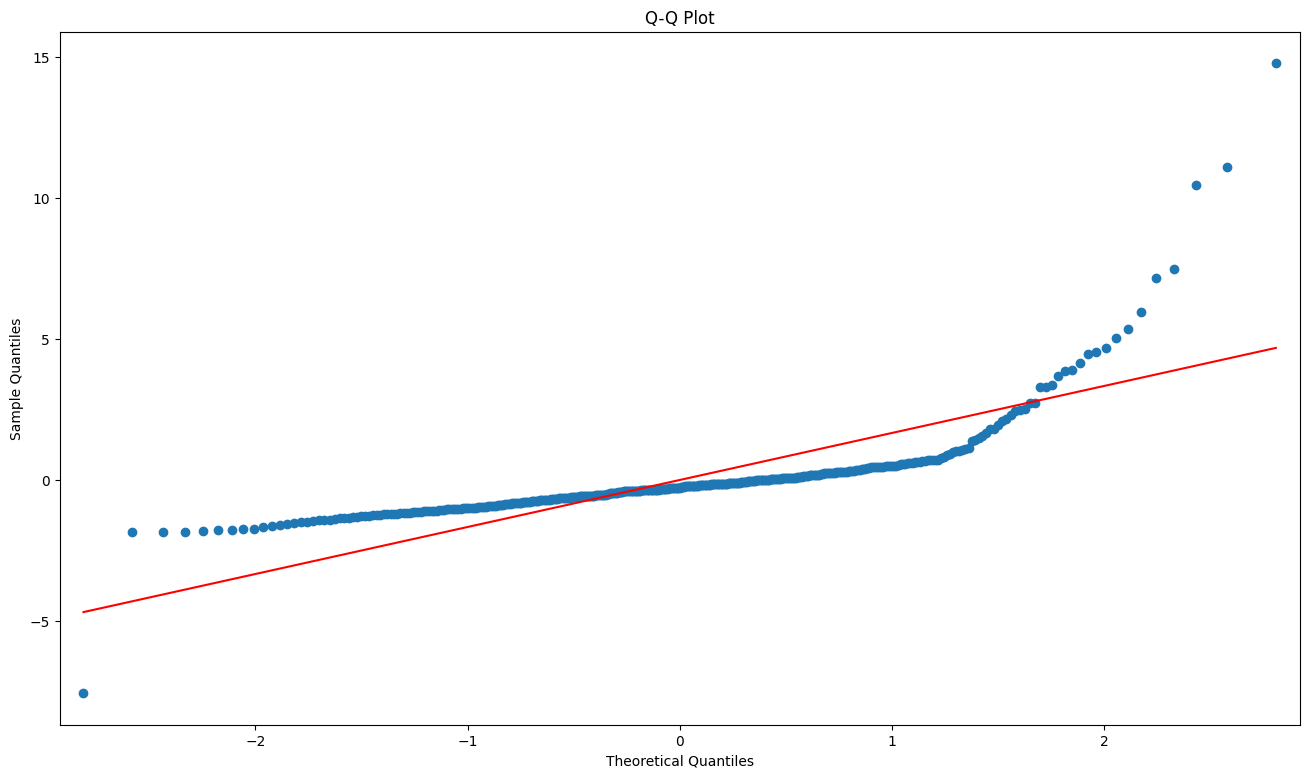

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:135: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




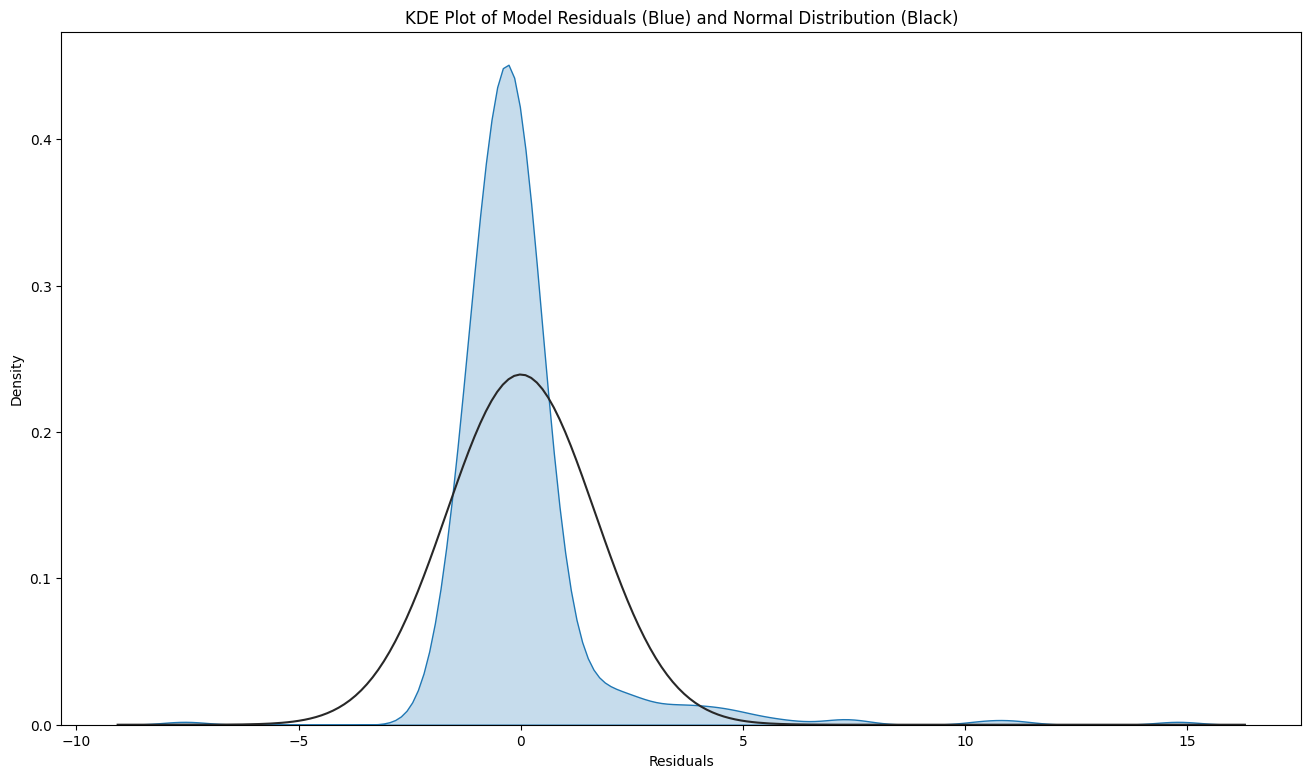

Statistic 0.6282056570053101
p-value 1.325702442009909e-28


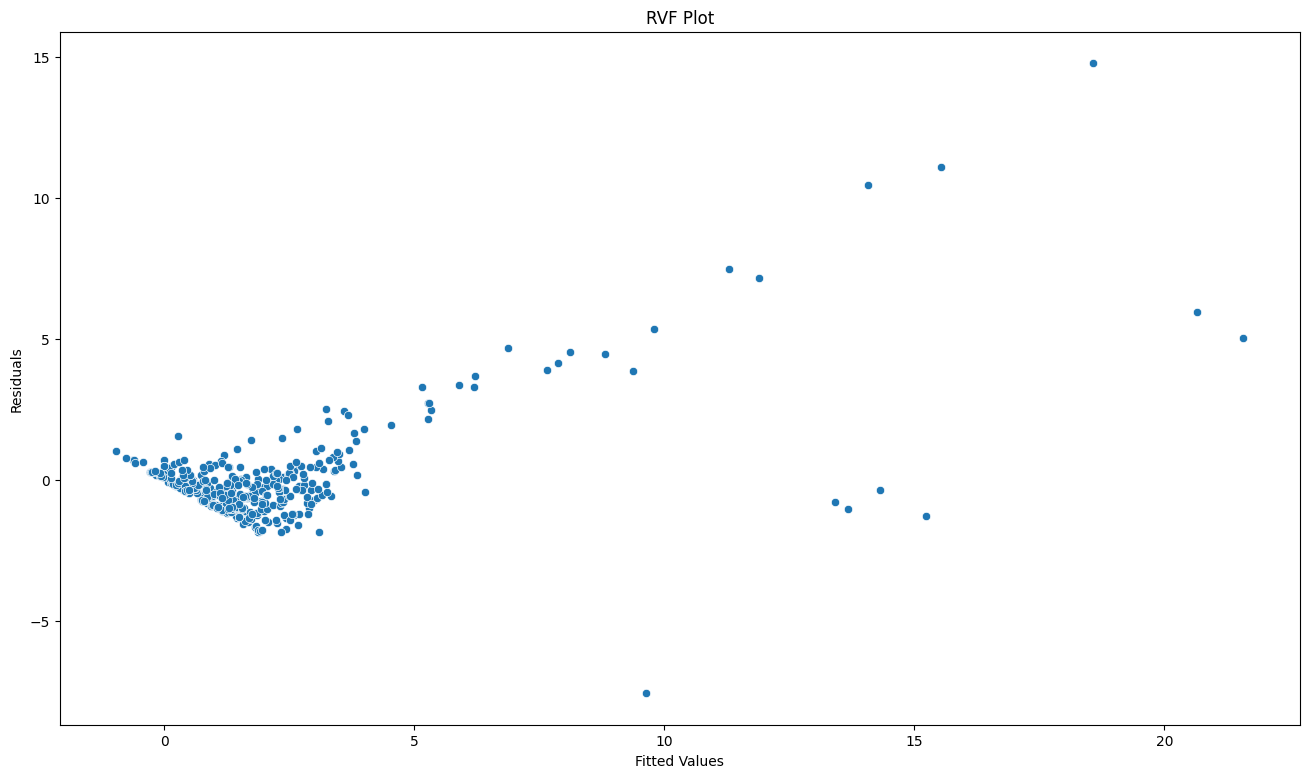

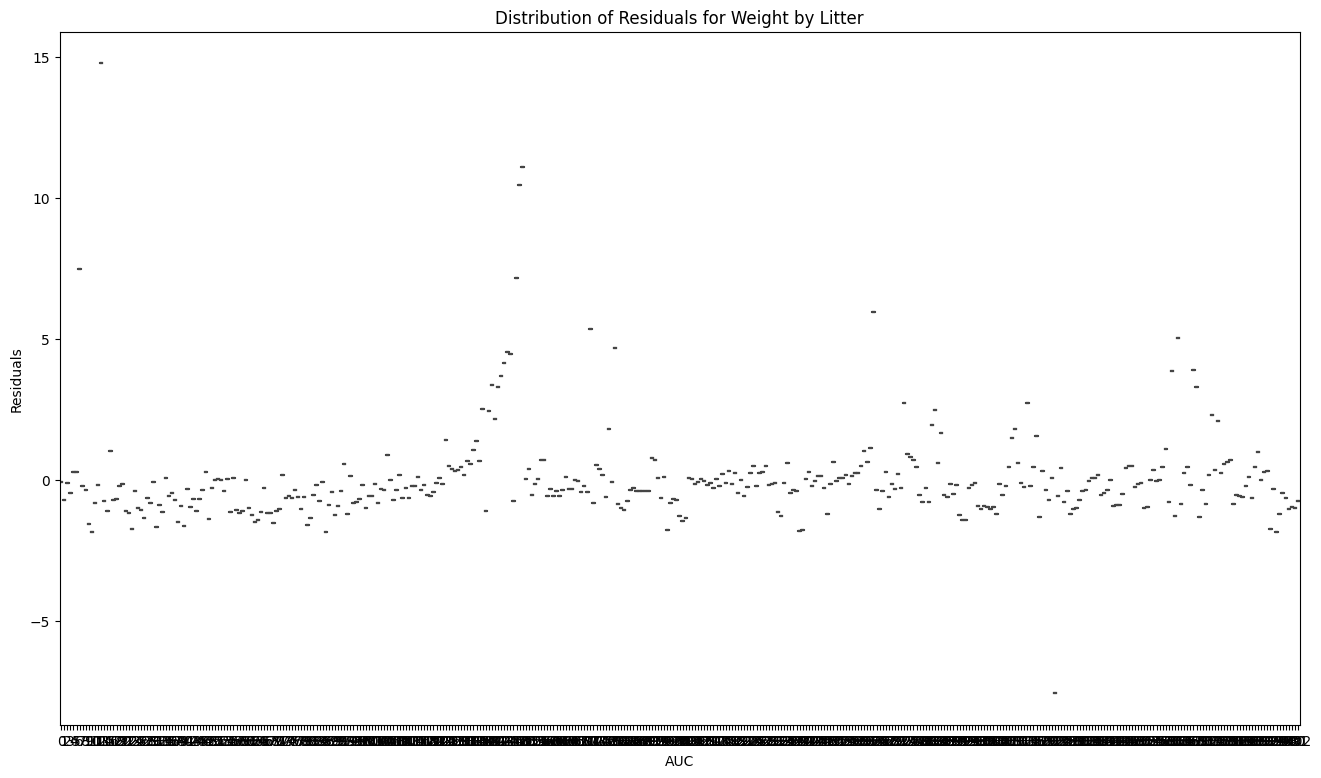

LM Statistic 333.7868270068698
LM-Test p-value 0.0020218936690491575
F-Statistic 2.548821873432841
F-Test p-value 1.677312080515014e-09
nan
marginal r2 = 0.2838939904447166
conditional r2 = 0.6419469952223582


In [8]:
from helpers import lmem_diagnostic

lmem_diagnostic(lmemf, data['AUC'], data)

In [9]:
temp = data.copy()
y = temp['AUC']
X = temp.drop(['AUC'], axis=1)

In [10]:
from category_encoders import TargetEncoder

X.applymap(lambda x : x.strip() if isinstance(x, str) else x)
X['Pgp'].replace(['no', 'yes'], [0, 1], inplace=True)
X['Position'].replace(['core', 'matrix'], [0, 1], inplace=True)
enc = TargetEncoder(cols=['Comp1', 'Comp2', 'Route'])
X = enc.fit_transform(X, y)

In [11]:
from scipy import stats

t_y, l = stats.boxcox(y)
data1 = X.copy()
data1['AUC'] = t_y

In [12]:
lmem = smf.mixedlm("AUC ~ Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route", data1, groups=data["Subject"])
lmemf = lmem.fit(method=['lbfgs'])
lmemf.summary()

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:               MixedLM  Dependent Variable:  AUC      
No. Observations:    403      Method:              REML     
No. Groups:          403      Scale:               0.8910   
Min. group size:     1        Log-Likelihood:      -724.1026
Max. group size:     1        Converged:           Yes      
Mean group size:     1.0                                    
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept        -5.779    0.203 -28.519 0.000 -6.176 -5.382
Weight           -0.000    0.000  -4.987 0.000 -0.000 -0.000
logP             -0.074    0.020  -3.759 0.000 -0.112 -0.035
Solubility       -0.001    0.002  -0.887 0.375 -0.005  0.002
Pgp              -0.078    0.150  -0.519 0.604 -0.372  0.216
DrugCarrierRatio  0.310    0.186   1.669 0.095 -0.054  0.673
Position         -0.484    0.216  -2.243 0.025 -0.907 -0.061
Comp1             0.789    0.124   6.363 0.000  0.546  1.032
Comp2             0.883    0.100   8.844 0.000  0.688  1.079
Size              0.000    0.001   0.474 0.636 -0.001  0.002
Zeta              0.003    0.003   1.043 0.297 -0.003  0.008
Release          -0.001    0.001  -1.245 0.213 -0.003  0.001
Route             1.091    0.132   8.246 0.000  0.832  1.350
Group Var         0.891                                     
============================================================

"""

In [13]:
from helpers import predict_lmem, radar_graph

pred = predict_lmem(lmemf)
pred

0    0.892415
1    1.106740
2   -0.331579
3   -0.117254
dtype: float64

In [14]:
true = stats.boxcox([1.03, 2.96, 0.365, 0.614], lmbda=l)
true

array([ 0.02960689,  1.15259094, -0.95401673, -0.47491058])

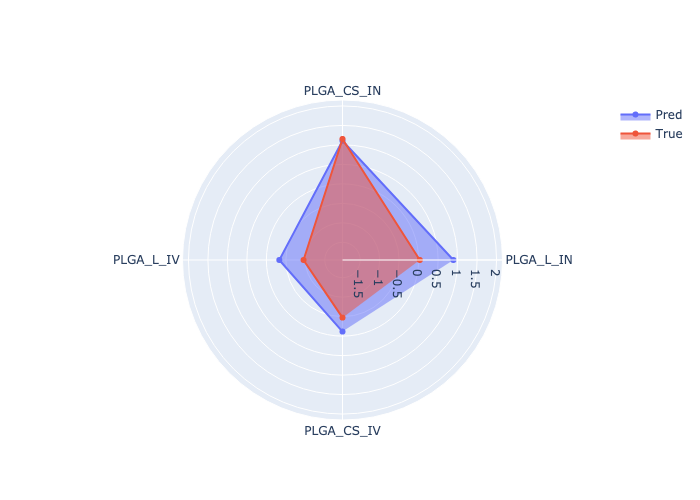

In [15]:
radar_graph(true, pred)

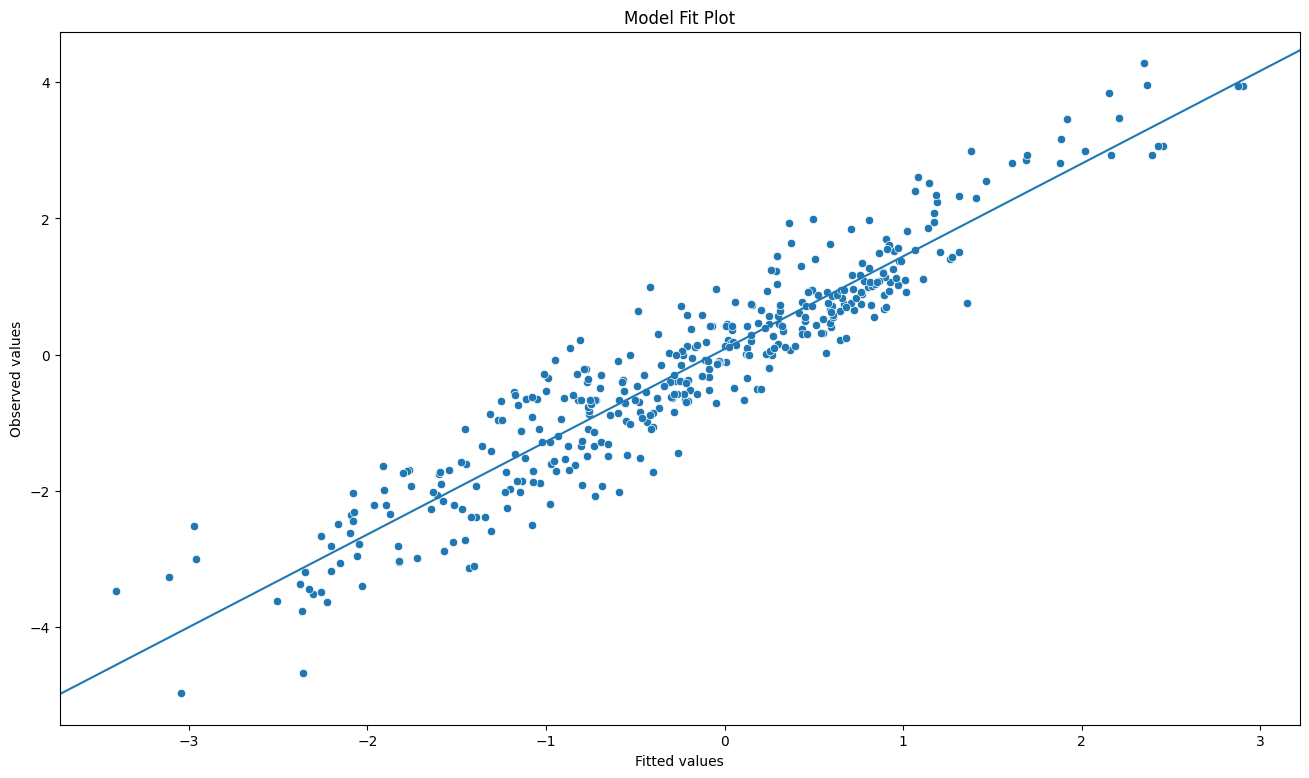

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:117: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



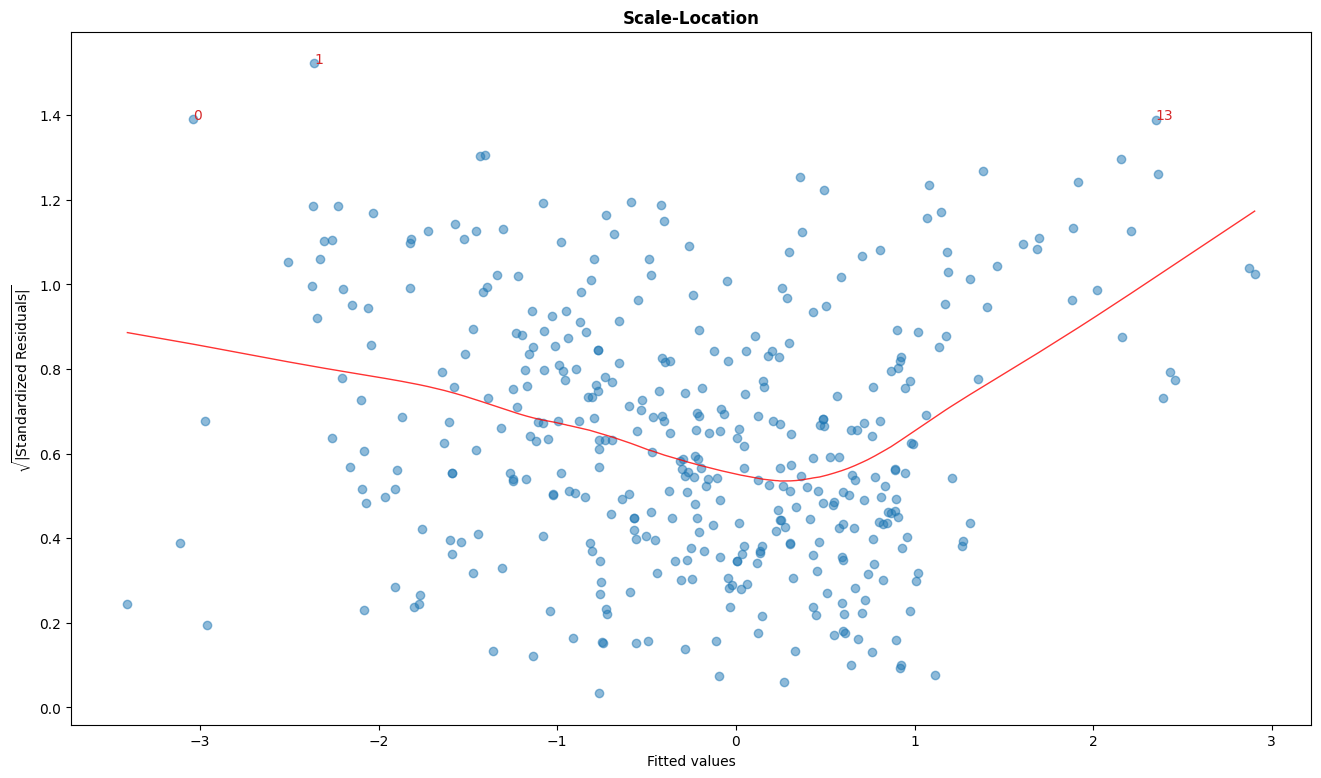

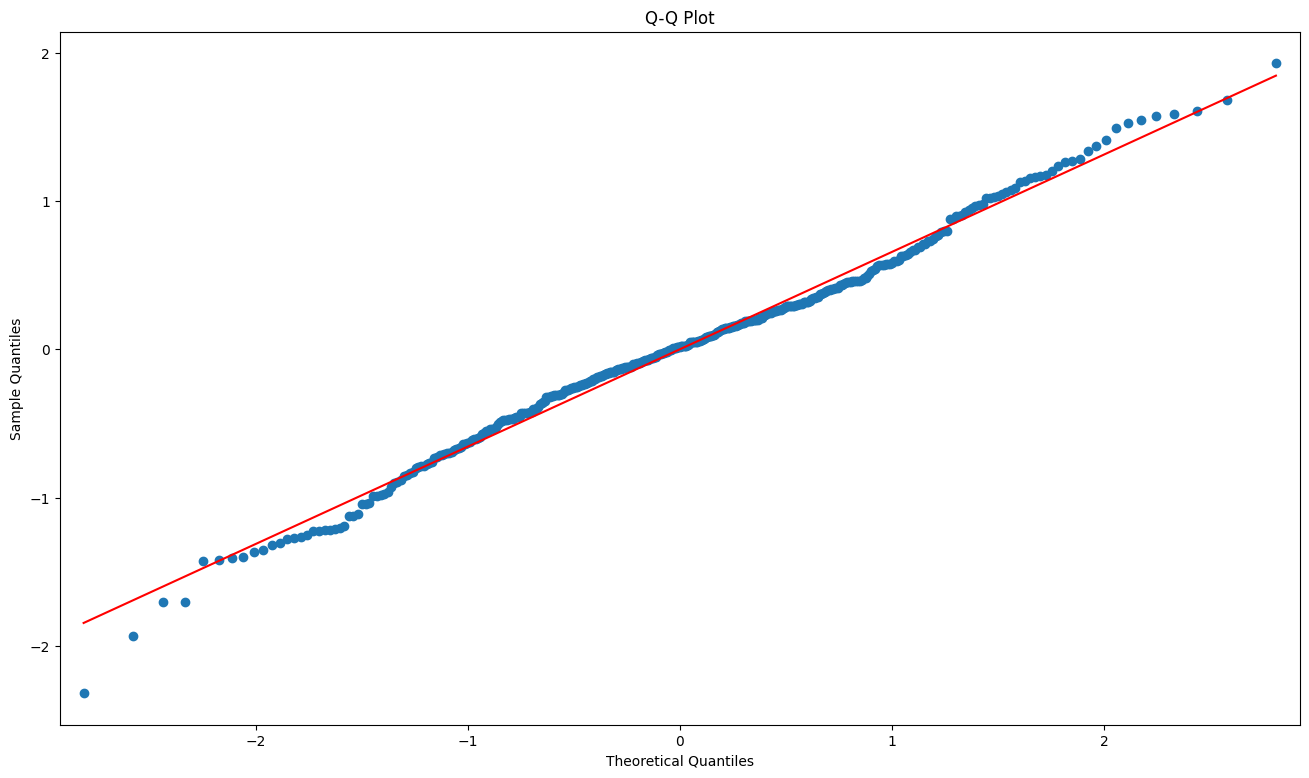

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:135: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




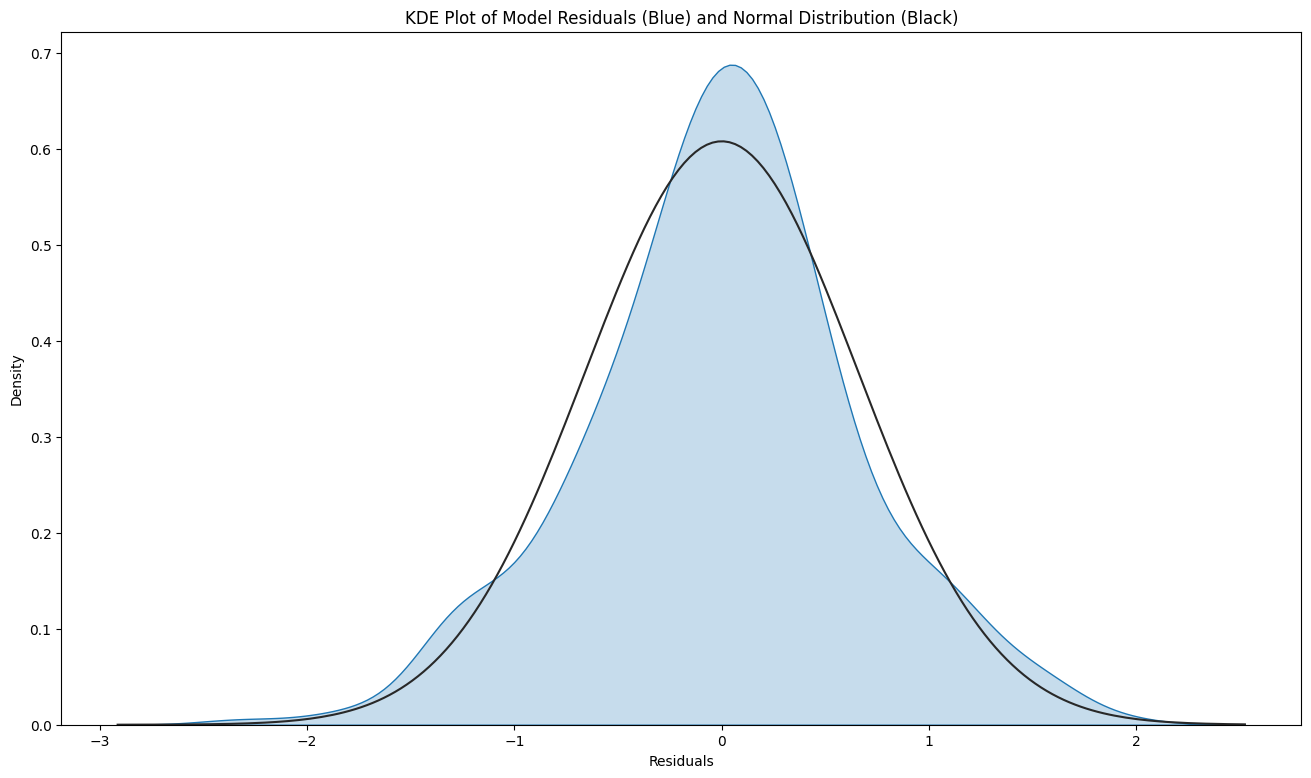

Statistic 0.992522120475769
p-value 0.041405707597732544


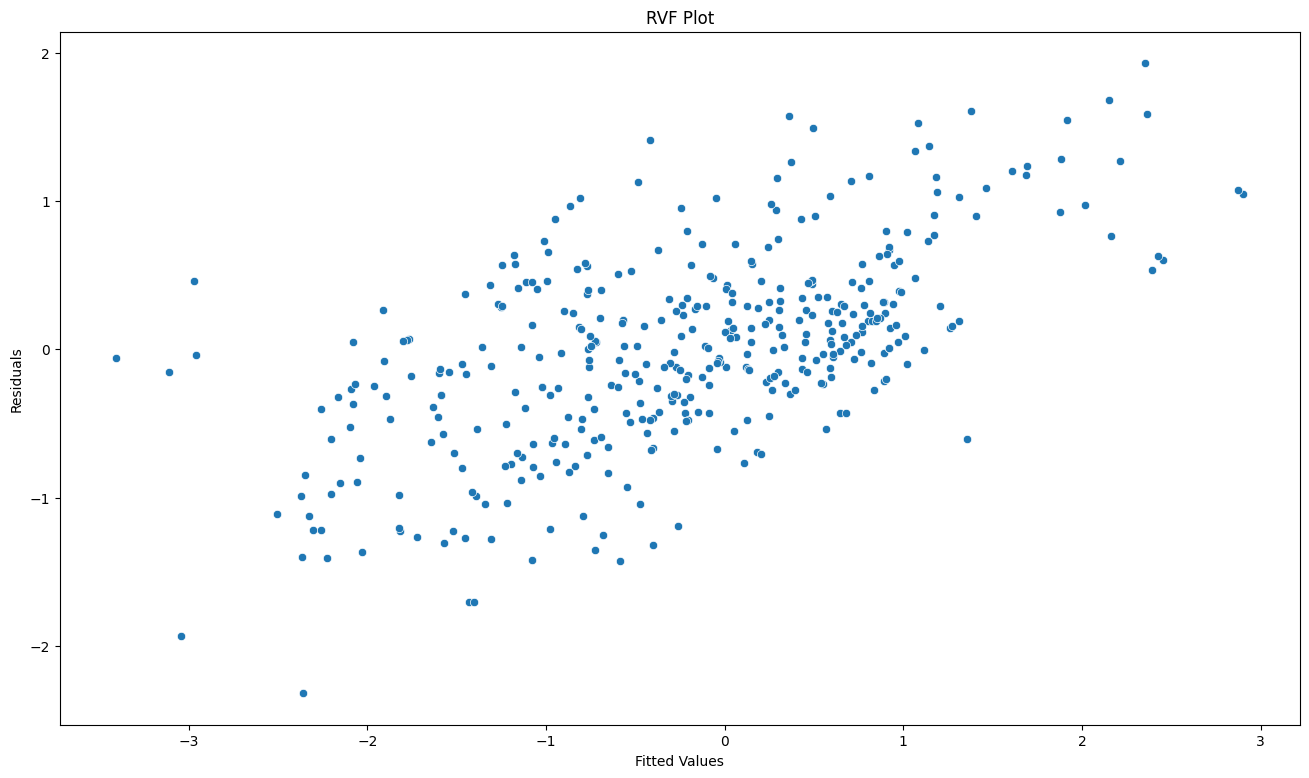

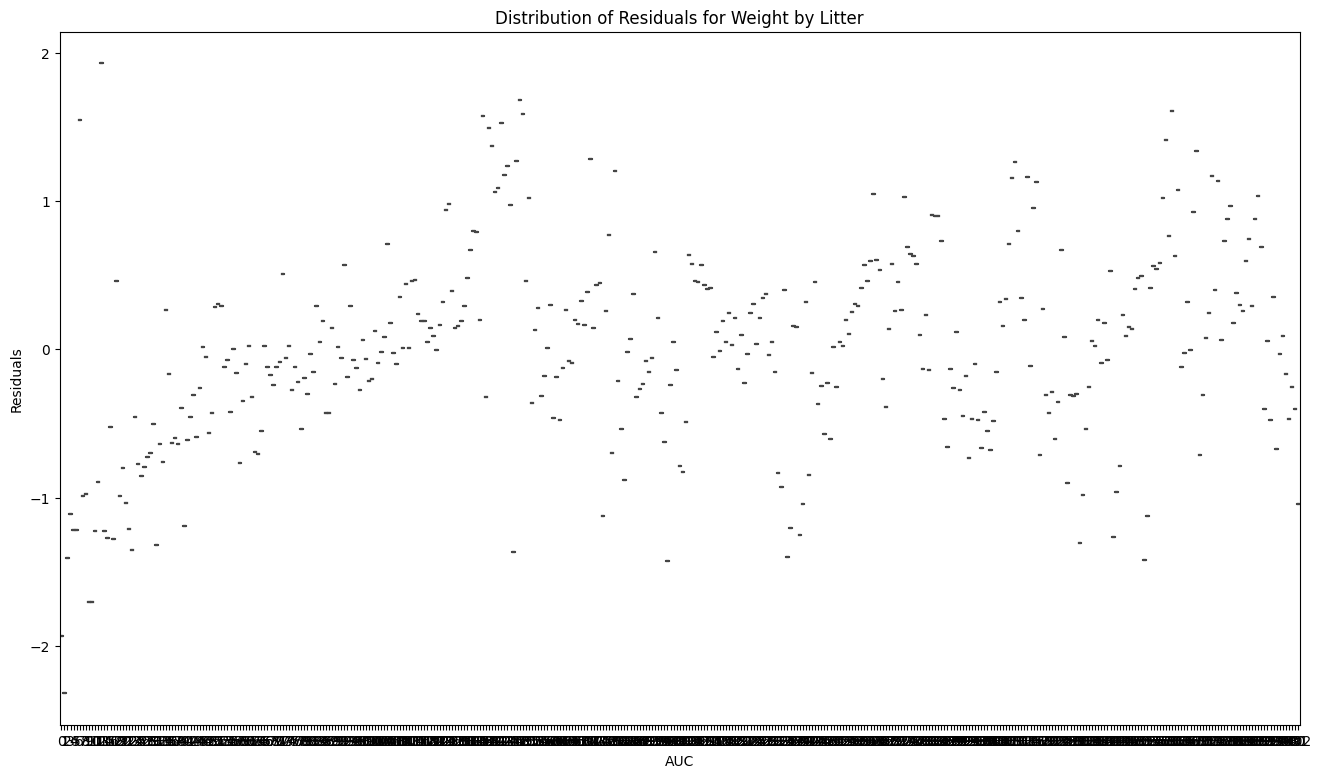

LM Statistic 133.40260840940087
LM-Test p-value 0.0012914420095411145
F-Statistic 1.7656133800704445
F-Test p-value 0.00020913342184168926
nan
marginal r2 = 0.29946463052178474
conditional r2 = 0.6497323152608924


In [16]:
lmem_diagnostic(lmemf, t_y, data1)

In [17]:
lmem = smf.mixedlm("AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data1, groups=data["Subject"])
lmemf = lmem.fit(method=['lbfgs'])
lmemf.summary()

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      AUC      
No. Observations:      403          Method:                  REML     
No. Groups:            403          Scale:                   0.6192   
Min. group size:       1            Log-Likelihood:          -883.7508
Max. group size:       1            Converged:               Yes      
Mean group size:       1.0                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    8.577    4.125  2.079 0.038  0.492 16.661
Weight                      -0.010    0.003 -3.869 0.000 -0.015 -0.005
logP                        -0.279    0.302 -0.925 0.355 -0.871  0.312
Solubility                  -0.302    0.410 -0.736 0.462 -1.105  0.502
Pgp                          5.087    1.761  2.888 0.004  1.635  8.540
DrugCarrierRatio            -0.771    2.315 -0.333 0.739 -5.308  3.766
Position                    -1.935    2.502 -0.773 0.439 -6.840  2.970
Comp1                       -4.929    1.566 -3.148 0.002 -7.998 -1.860
Comp2                       -3.186    1.688 -1.887 0.059 -6.494  0.123
Size                         0.017    0.011  1.621 0.105 -0.004  0.038
Zeta                        -0.019    0.038 -0.505 0.613 -0.093  0.055
Release                     -0.626    0.093 -6.722 0.000 -0.809 -0.444
Route                       -1.786    1.684 -1.061 0.289 -5.086  1.514
Weight:logP                 -0.000    0.000 -3.858 0.000 -0.001 -0.000
Weight:Solubility            0.000    0.000  3.720 0.000  0.000  0.000
Weight:Pgp                   0.002    0.000  4.282 0.000  0.001  0.002
Weight:DrugCarrierRatio      0.003    0.001  2.770 0.006  0.001  0.005
Weight:Position              0.001    0.001  1.058 0.290 -0.001  0.003
Weight:Comp1                 0.004    0.001  3.830 0.000  0.002  0.006
Weight:Comp2                 0.002    0.000  3.280 0.001  0.001  0.002
Weight:Size                 -0.000    0.000 -2.382 0.017 -0.000 -0.000
Weight:Zeta                  0.000    0.000  2.555 0.011  0.000  0.000
Weight:Release               0.000    0.000  1.979 0.048  0.000  0.000
Weight:Route                -0.001    0.001 -1.196 0.232 -0.002  0.000
logP:Solubility             -0.031    0.027 -1.146 0.252 -0.083  0.022
logP:Pgp                    -0.070    0.080 -0.881 0.378 -0.226  0.086
logP:DrugCarrierRatio       -0.053    0.096 -0.554 0.580 -0.241  0.135
logP:Position                0.095    0.155  0.610 0.542 -0.209  0.399
logP:Comp1                   0.035    0.062  0.566 0.572 -0.086  0.156
logP:Comp2                   0.143    0.116  1.232 0.218 -0.085  0.371
logP:Size                    0.000    0.000  0.747 0.455 -0.000  0.001
logP:Zeta                   -0.001    0.001 -0.520 0.603 -0.003  0.002
logP:Release                -0.004    0.004 -1.186 0.236 -0.011  0.003
logP:Route                  -0.002    0.045 -0.050 0.960 -0.090  0.086
Solubility:Pgp              -0.116    0.138 -0.844 0.399 -0.386  0.154
Solubility:DrugCarrierRatio  0.660    0.219  3.009 0.003  0.230  1.090
Solubility:Position          0.285    0.128  2.219 0.026  0.033  0.536
Solubility:Comp1             0.021    0.074  0.284 0.776 -0.123  0.165
Solubility:Comp2            -0.104    0.140 -0.744 0.457 -0.379  0.170
Solubility:Size              0.001    0.000  3.217 0.001  0.000  0.001
Solubility:Zeta             -0.003    0.001 -2.990 0.003 -0.006 -0.001
Solubility:Release           0.001    0.001  0.880 0.379 -0.001  0.003
Solubility:Route            -0.000    0.026 -0.001 0.999 -0.052  0.052
Pgp:DrugCarrierRatio         0.938    0.584  1.607 0.108 -0.206  2.083
Pgp:Position                 0.282    0.648  0.434 0.664 -0.989

In [18]:
pred = predict_lmem(lmemf)
pred

0    0.118575
1    1.120193
2   -1.392433
3   -0.883953
dtype: float64

In [19]:
true = stats.boxcox([1.03, 2.96, 0.365, 0.614], lmbda=l)
true

array([ 0.02960689,  1.15259094, -0.95401673, -0.47491058])

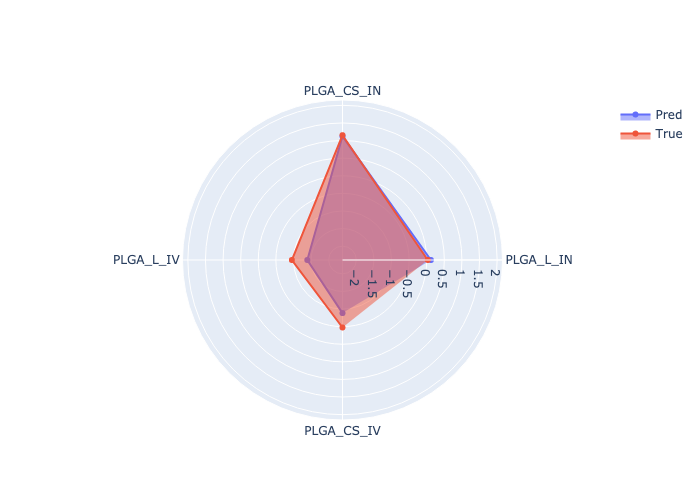

In [20]:
radar_graph(true, pred)

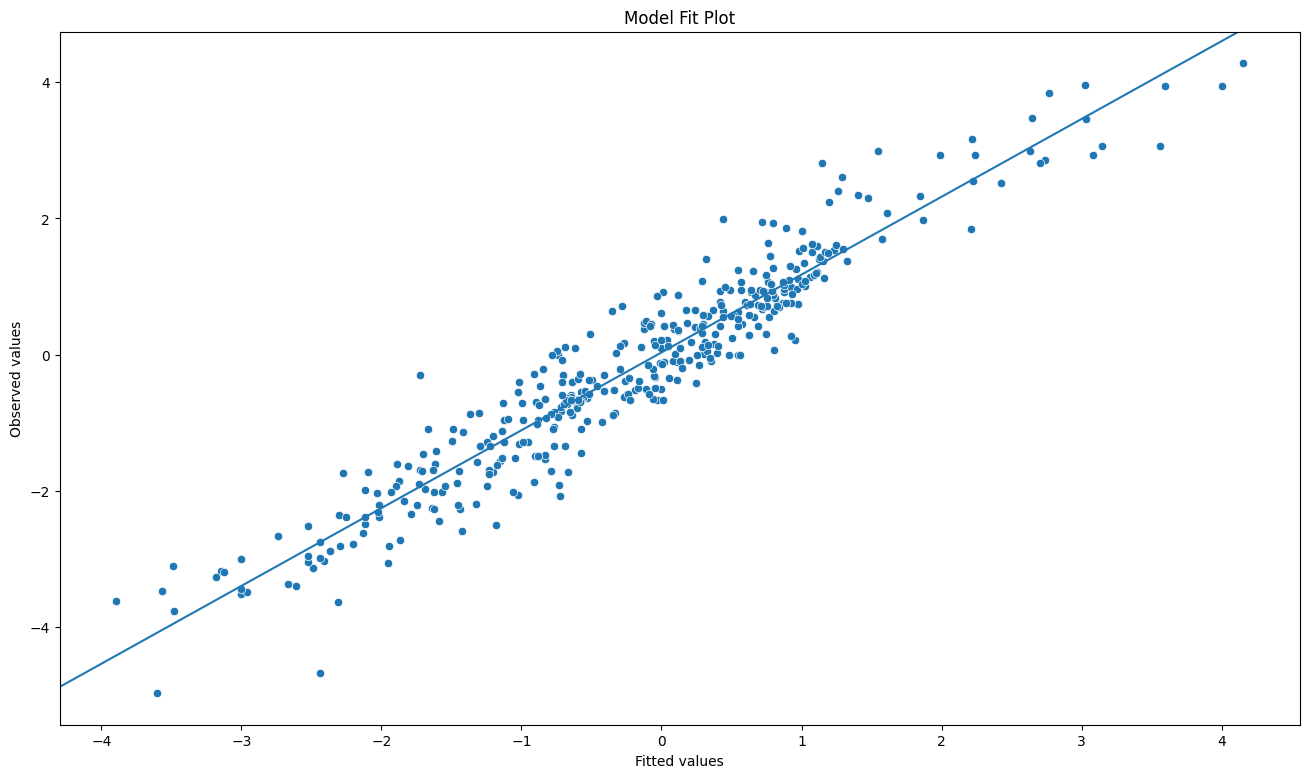

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:117: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



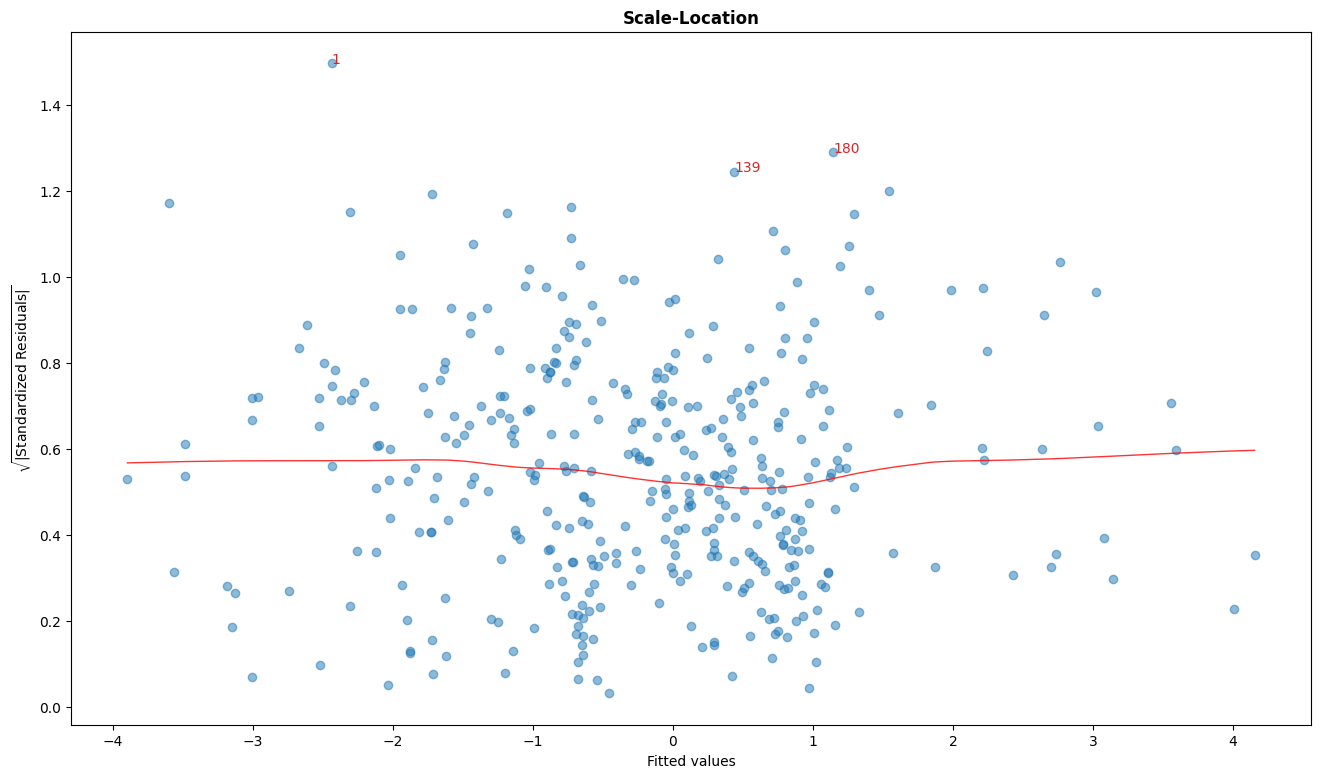

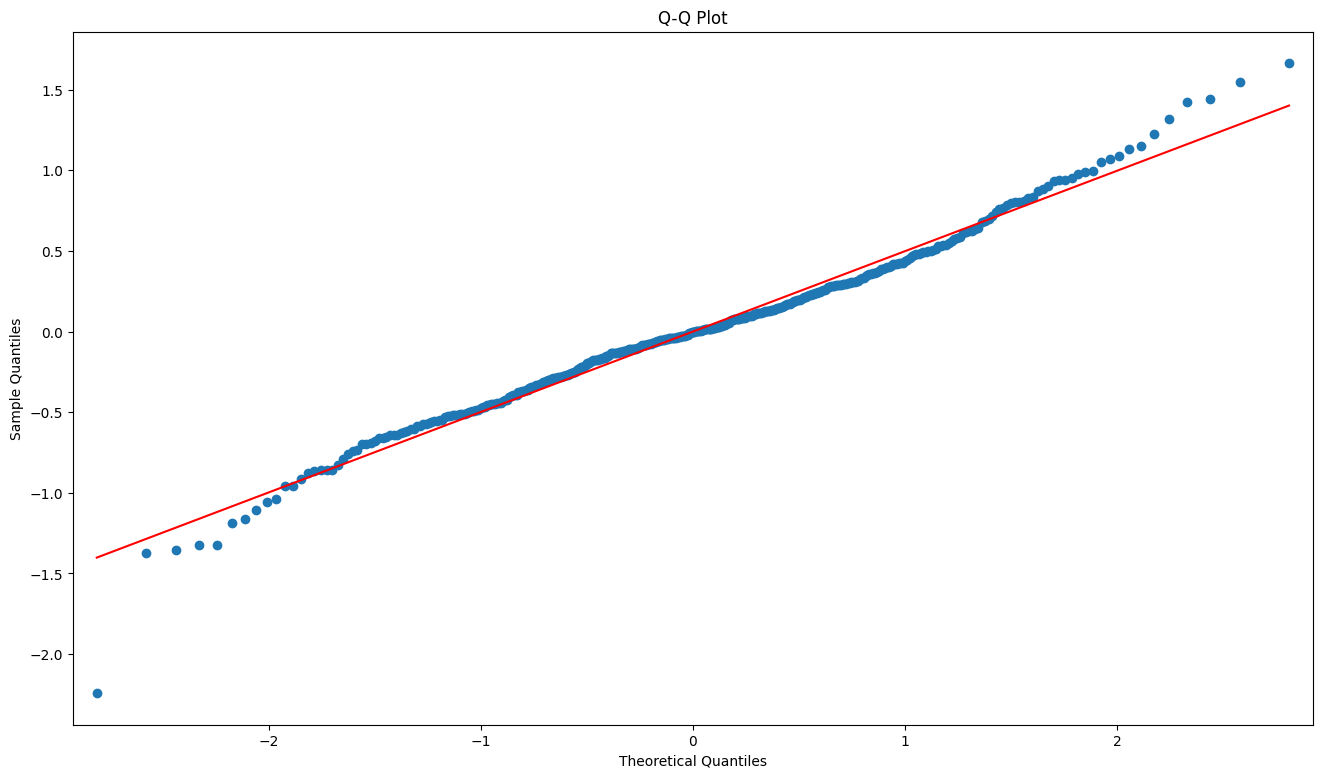

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:135: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




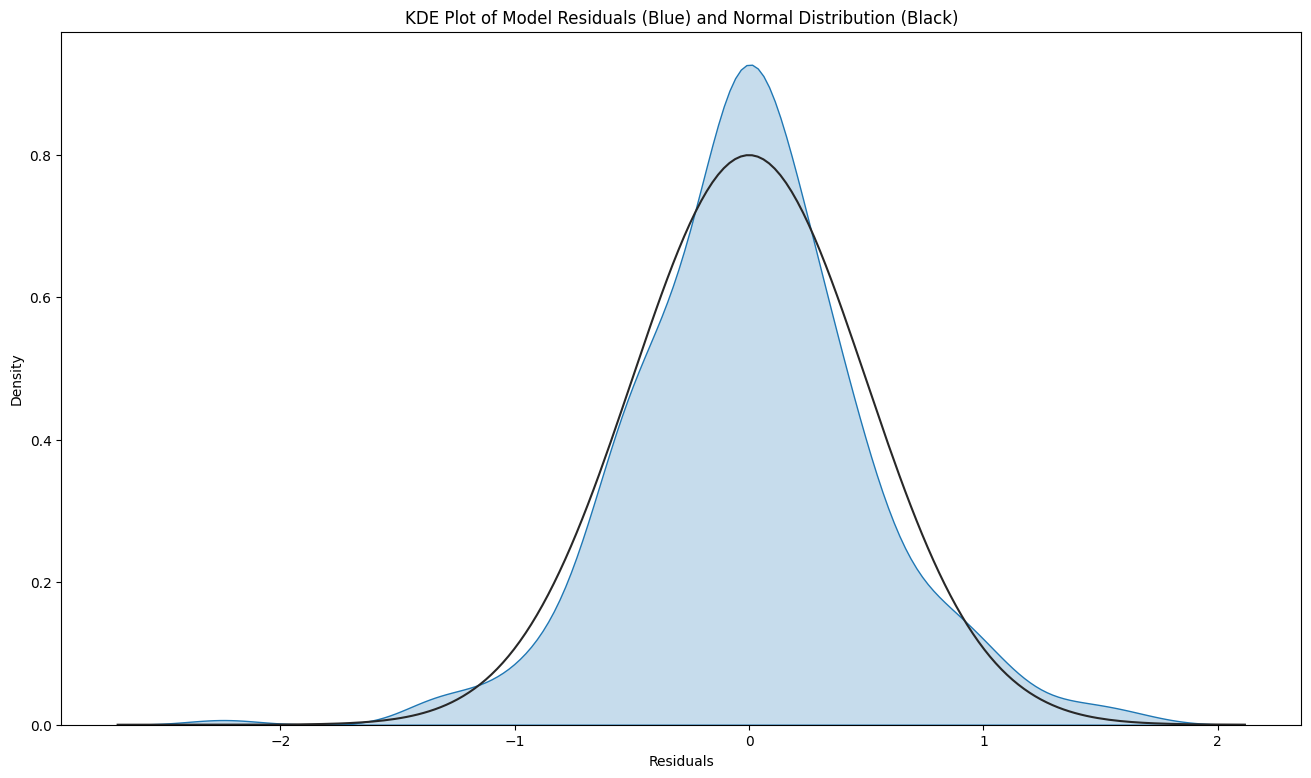

Statistic 0.9850905537605286
p-value 0.00036627589724957943


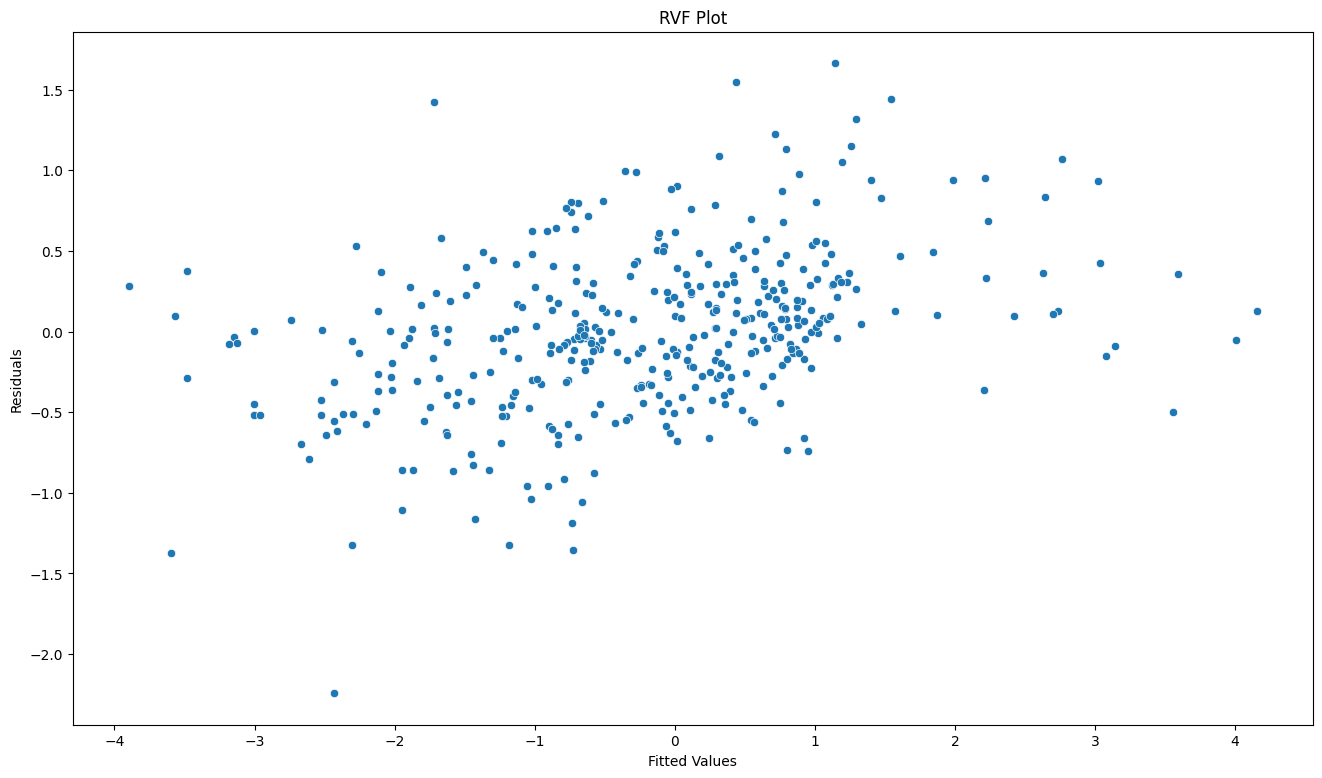

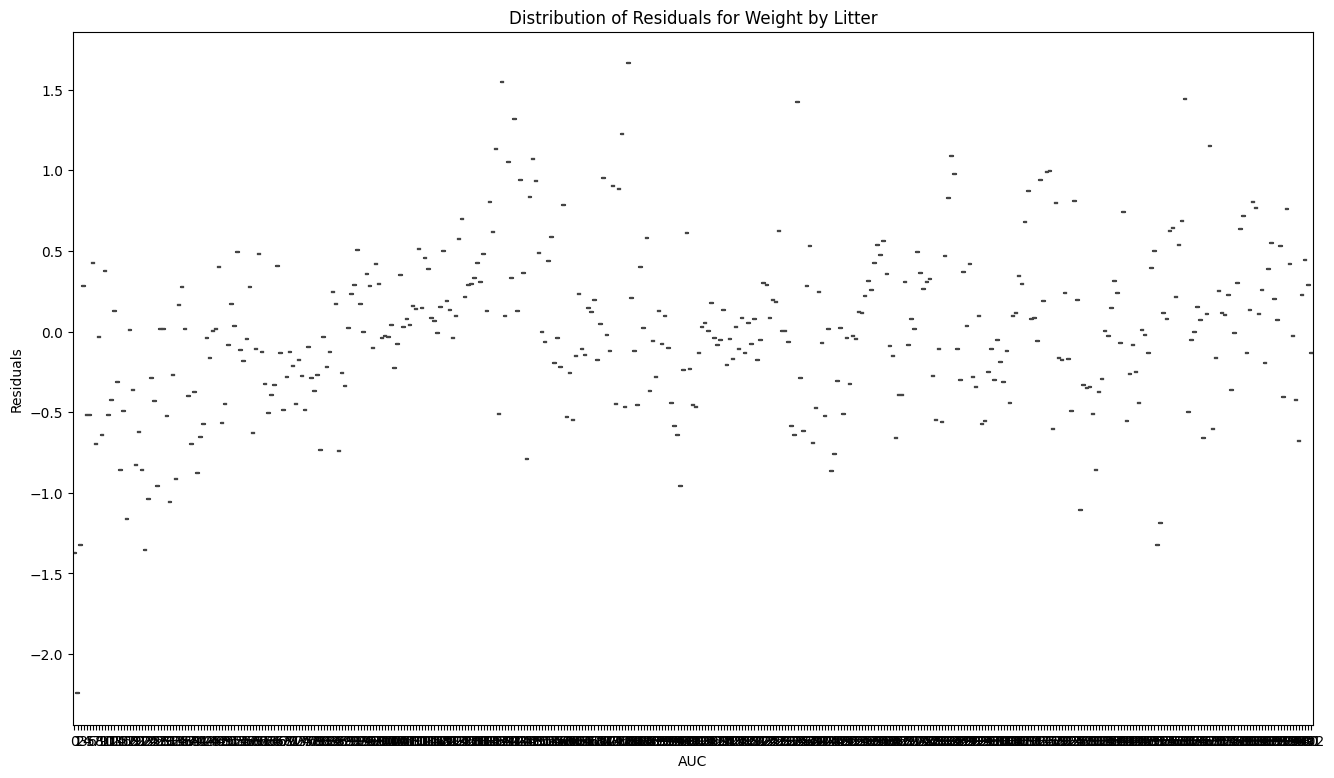

White's heterogeneity test failed
nan
marginal r2 = 0.5464990447689048
conditional r2 = 0.7732495223844524


In [21]:
lmem_diagnostic(lmemf, t_y, data1)

In [22]:
log_y = np.log(y)
data2 = X.copy()
data2['AUC'] = log_y

In [23]:
lmem = smf.mixedlm("AUC ~ (Weight + logP + Solubility + Pgp + DrugCarrierRatio + Position + Comp1 + Comp2 + Size + Zeta + Release + Route)**2", data2, groups=data["Subject"])
lmemf = lmem.fit(method=['lbfgs'])
lmemf.summary()

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning:

The Hessian matrix at the estimated parameter values is not positive definite.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:                 MixedLM      Dependent Variable:      AUC      
No. Observations:      403          Method:                  REML     
No. Groups:            403          Scale:                   0.7310   
Min. group size:       1            Log-Likelihood:          -910.6372
Max. group size:       1            Converged:               Yes      
Mean group size:       1.0                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                    8.378    4.714  1.777 0.076 -0.861 17.618
Weight                      -0.012    0.003 -4.030 0.000 -0.017 -0.006
logP                        -0.337    0.329 -1.026 0.305 -0.981  0.307
Solubility                  -0.417    0.440 -0.946 0.344 -1.279  0.446
Pgp                          4.983    1.918  2.597 0.009  1.223  8.742
DrugCarrierRatio             0.131    2.515  0.052 0.959 -4.799  5.060
Position                    -2.296    2.722 -0.844 0.399 -7.631  3.038
Comp1                       -5.034    1.746 -2.883 0.004 -8.456 -1.612
Comp2                       -2.992    1.910 -1.567 0.117 -6.736  0.751
Size                         0.018    0.011  1.564 0.118 -0.005  0.040
Zeta                        -0.029    0.041 -0.708 0.479 -0.110  0.051
Release                     -0.734    0.099 -7.412 0.000 -0.928 -0.540
Route                       -1.388    1.856 -0.748 0.455 -5.025  2.250
Weight:logP                 -0.000    0.000 -3.334 0.001 -0.001 -0.000
Weight:Solubility            0.000    0.000  3.905 0.000  0.000  0.000
Weight:Pgp                   0.002    0.000  4.012 0.000  0.001  0.003
Weight:DrugCarrierRatio      0.003    0.001  2.693 0.007  0.001  0.005
Weight:Position              0.001    0.001  1.270 0.204 -0.001  0.004
Weight:Comp1                 0.004    0.001  3.822 0.000  0.002  0.006
Weight:Comp2                 0.002    0.001  2.945 0.003  0.001  0.003
Weight:Size                 -0.000    0.000 -2.125 0.034 -0.000 -0.000
Weight:Zeta                  0.000    0.000  2.367 0.018  0.000  0.000
Weight:Release               0.000    0.000  1.828 0.068 -0.000  0.000
Weight:Route                -0.001    0.001 -0.773 0.439 -0.002  0.001
logP:Solubility             -0.036    0.029 -1.253 0.210 -0.093  0.020
logP:Pgp                    -0.078    0.086 -0.906 0.365 -0.248  0.091
logP:DrugCarrierRatio       -0.030    0.104 -0.290 0.772 -0.233  0.173
logP:Position                0.033    0.168  0.194 0.846 -0.297  0.363
logP:Comp1                   0.033    0.067  0.486 0.627 -0.099  0.164
logP:Comp2                   0.171    0.127  1.347 0.178 -0.078  0.419
logP:Size                    0.000    0.000  0.748 0.454 -0.001  0.001
logP:Zeta                   -0.000    0.001 -0.423 0.673 -0.003  0.002
logP:Release                -0.005    0.004 -1.186 0.236 -0.012  0.003
logP:Route                  -0.003    0.049 -0.056 0.955 -0.098  0.093
Solubility:Pgp              -0.129    0.149 -0.866 0.387 -0.422  0.164
Solubility:DrugCarrierRatio  0.772    0.236  3.263 0.001  0.308  1.235
Solubility:Position          0.310    0.139  2.226 0.026  0.037  0.584
Solubility:Comp1             0.049    0.080  0.616 0.538 -0.107  0.205
Solubility:Comp2            -0.097    0.151 -0.645 0.519 -0.393  0.199
Solubility:Size              0.001    0.000  3.179 0.001  0.000  0.001
Solubility:Zeta             -0.004    0.001 -2.970 0.003 -0.006 -0.001
Solubility:Release           0.001    0.001  1.012 0.312 -0.001  0.004
Solubility:Route            -0.010    0.029 -0.355 0.723 -0.066  0.046
Pgp:DrugCarrierRatio         0.864    0.635  1.362 0.173 -0.380  2.108
Pgp:Position                 0.513    0.704  0.728 0.466 -0.867

In [24]:
true = np.log([1.03, 2.96, 0.365, 0.614])
true

array([ 0.0295588 ,  1.08518927, -1.00785793, -0.48776035])

In [25]:
pred = predict_lmem(lmemf)
pred

0   -0.050583
1    0.908858
2   -1.654446
3   -1.271485
dtype: float64

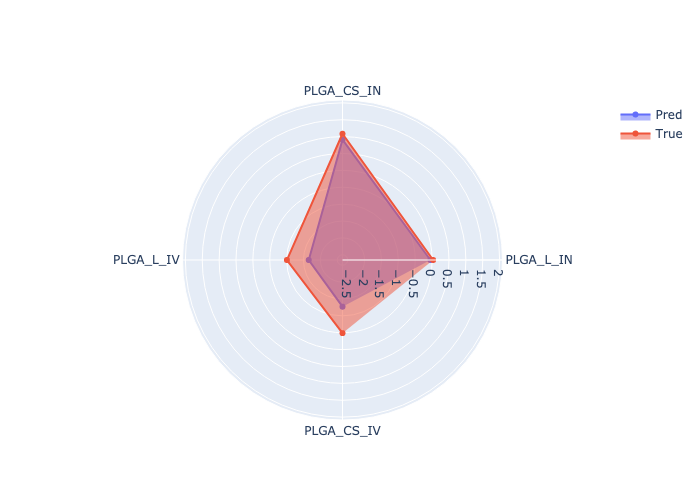

In [26]:
radar_graph(true, pred)

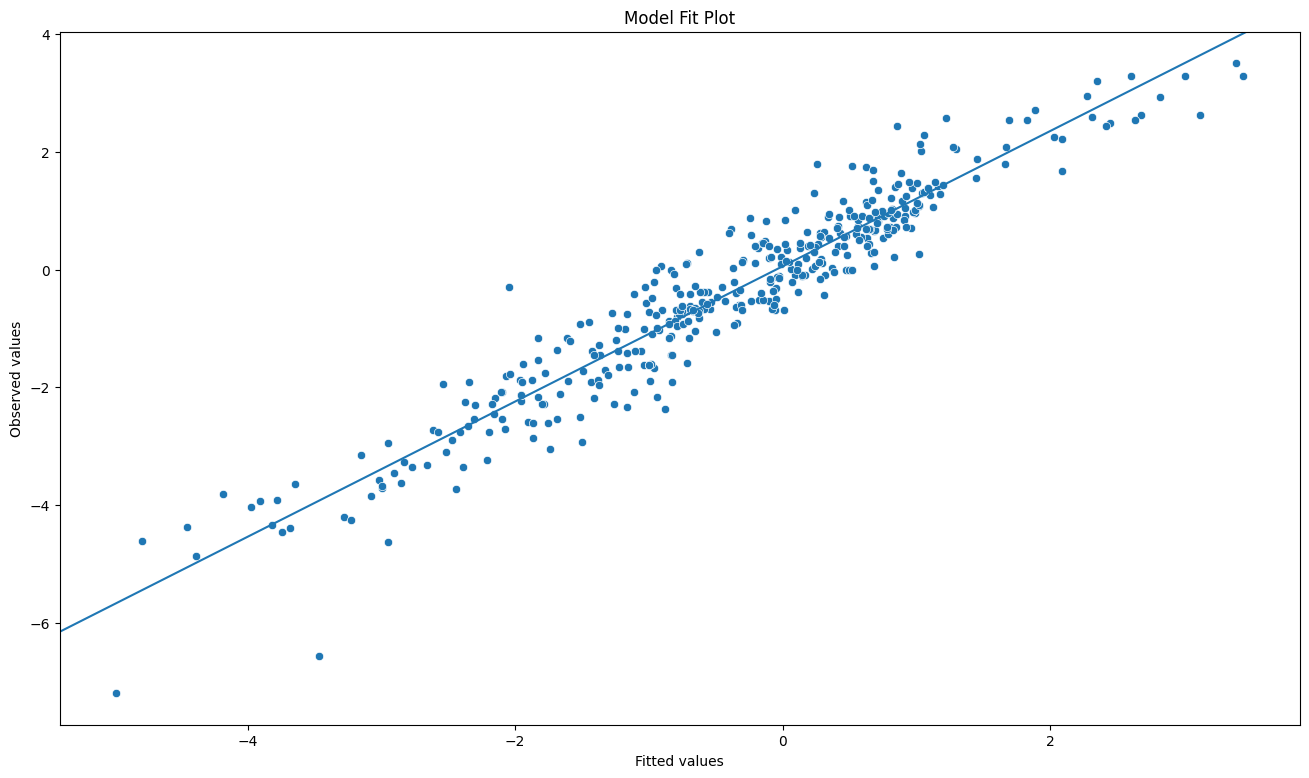

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:117: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



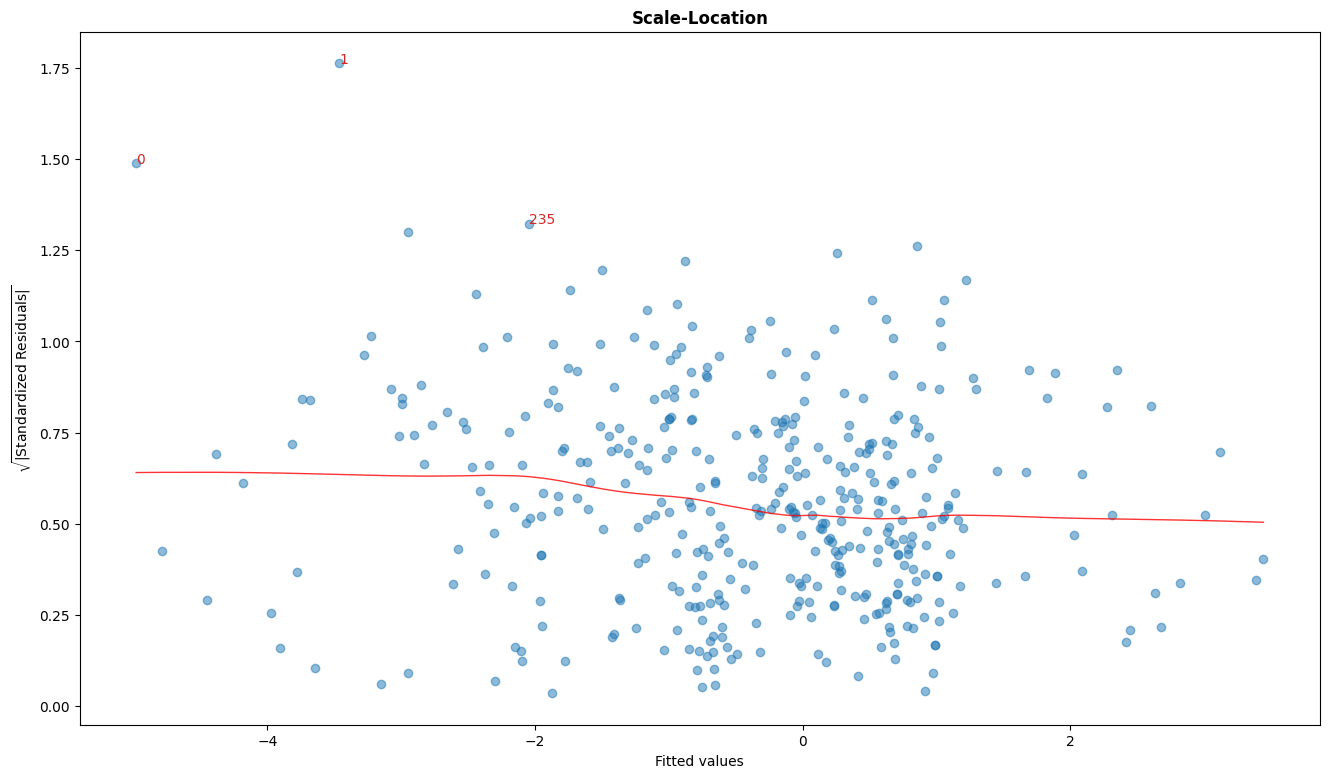

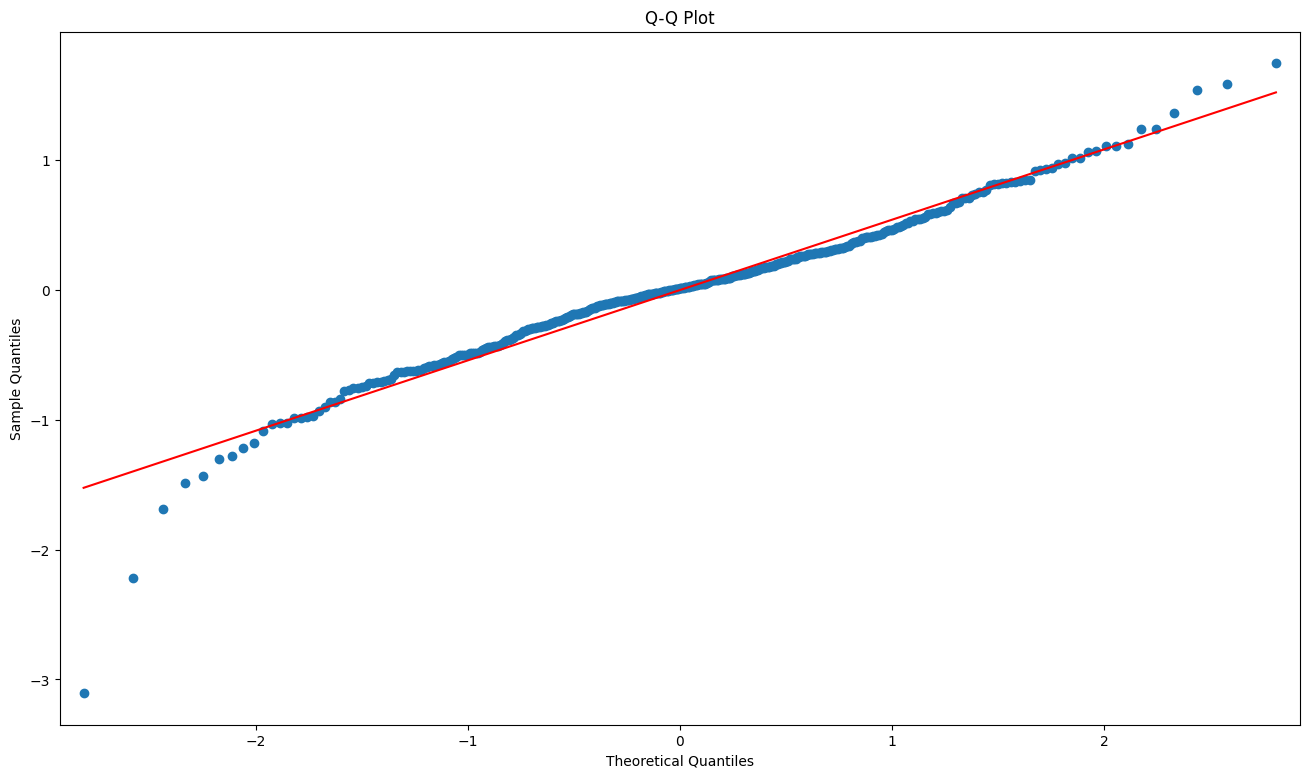

/Users/introvertuoso/PycharmProjects/BrainTargeting/notebooks/helpers.py:135: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




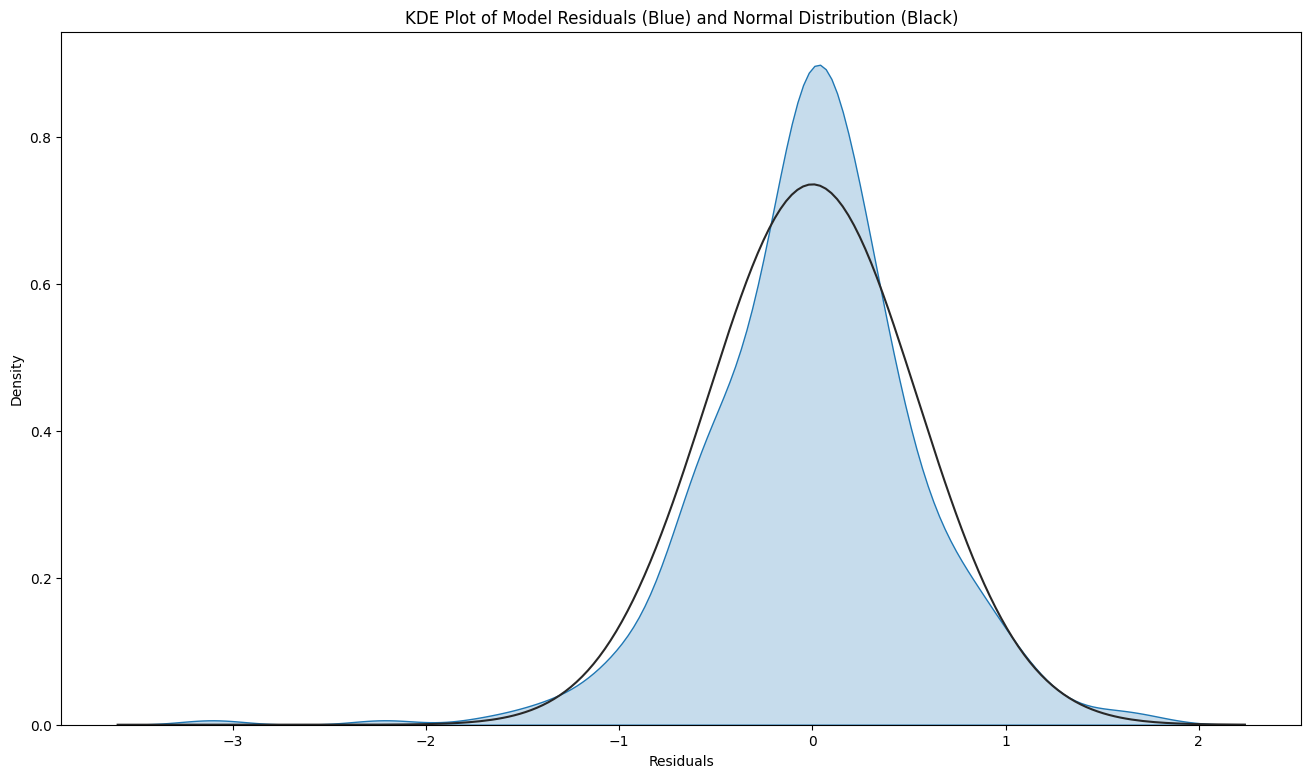

Statistic 0.9661763310432434
p-value 4.993884772375168e-08


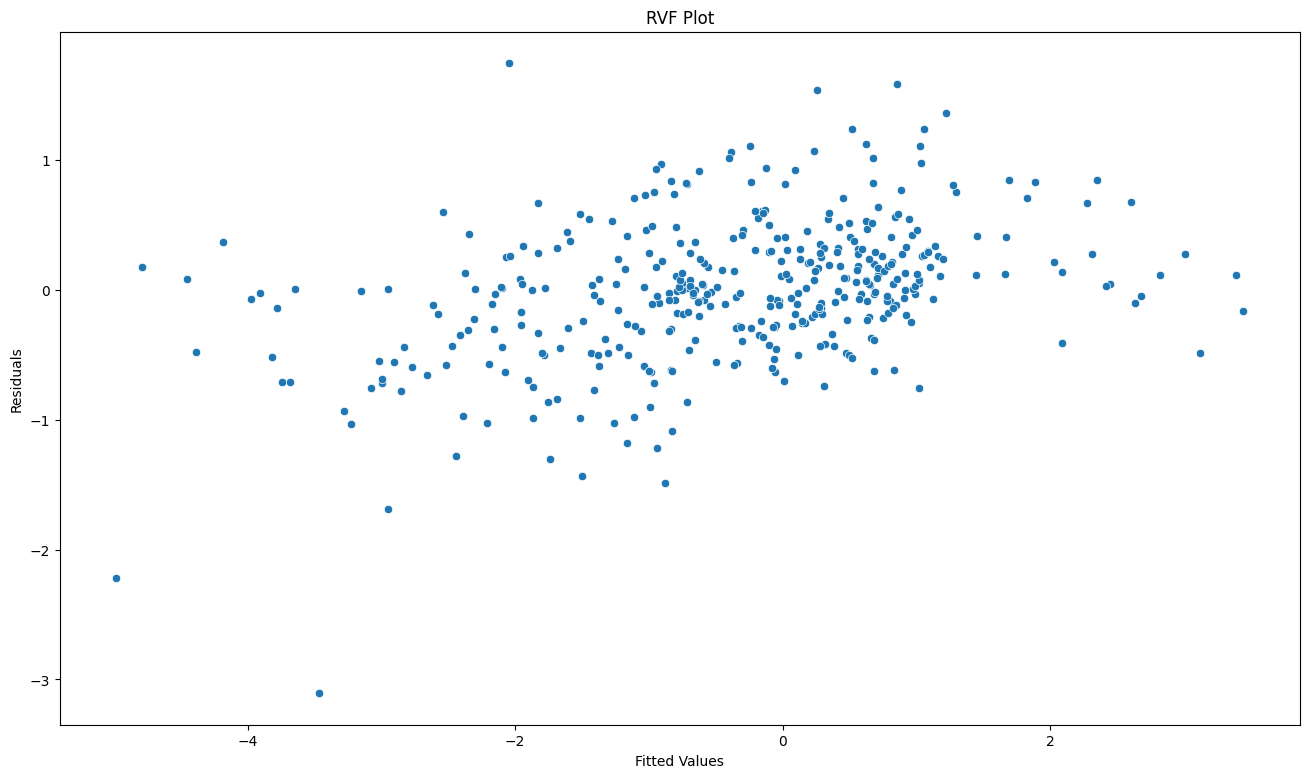

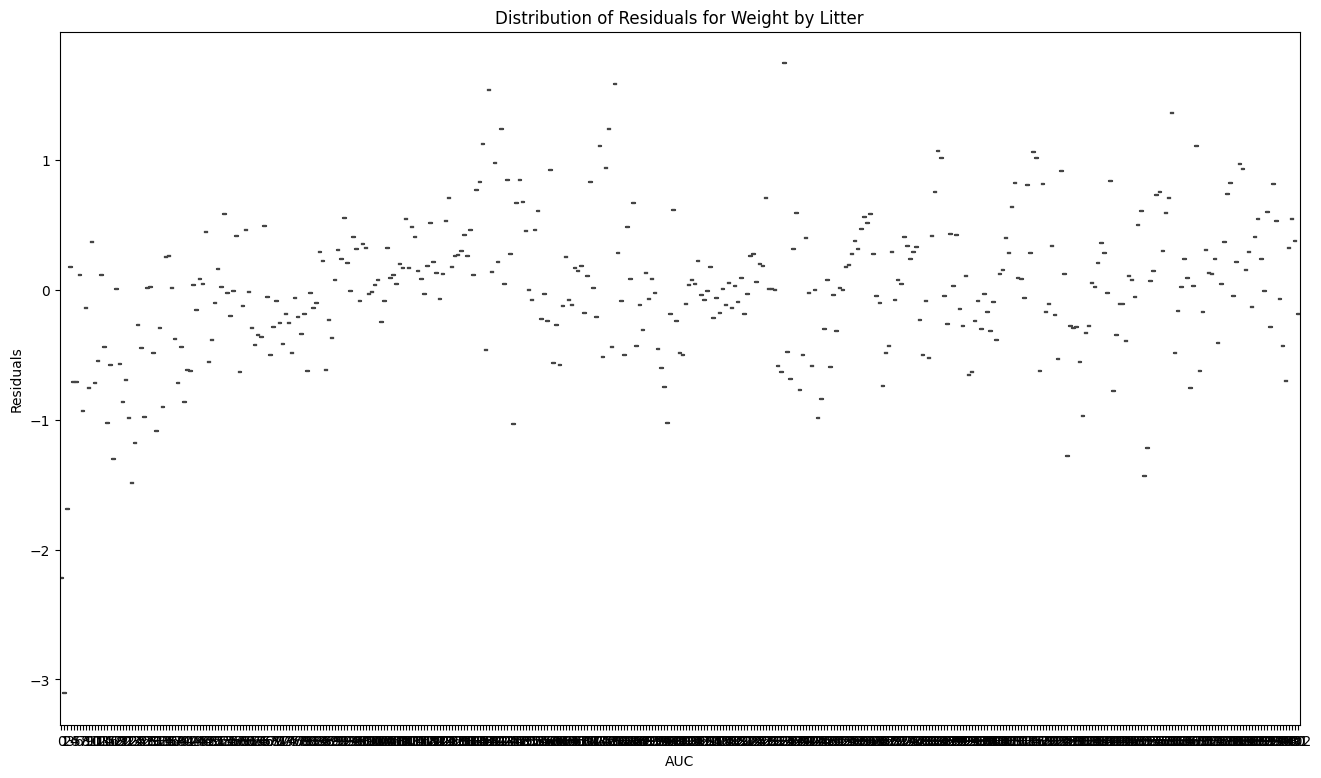

White's heterogeneity test failed
nan
marginal r2 = 0.5348699798633364
conditional r2 = 0.7674349899316683


In [27]:
lmem_diagnostic(lmemf, log_y, data2)